**Imporing all the required libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

**ARIMA Model for Time Series Forecasting with Python**<br>
A popular and widely used statistical method for time series forecasting is the ARIMA model.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.

**Autoregressive Integrated Moving Average Model**<br>
An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

    AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
    I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
    MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
    

 A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

    p: The number of lag observations included in the model, also called the lag order.
    d: The number of times that the raw observations are differenced, also called the degree of differencing.
    q: The size of the moving average window, also called the order of moving average.


A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model.

In [3]:
data = pd.read_csv("gas-furnace.csv")
data.head()

,InputGasRate,CO2
0,-0.109,53.8
1,0.000,53.6
2,0.178,53.5
3,0.339,53.5
4,0.373,53.4


**Plotting the variation of the Input Gas Rate with the CO2 release**

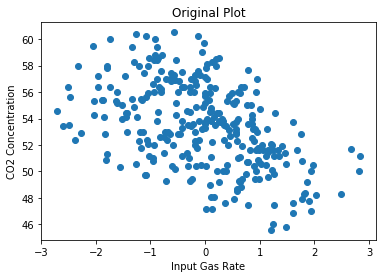

In [4]:
%matplotlib inline
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Input Gas Rate')
ax1.set_ylabel('CO2 Concentration')
ax1.set_title('Original Plot')
ax1.scatter('InputGasRate', 'CO2', data = data);

In [5]:
data['Ticks'] = range(0,len(data.index.values))
data.head()

,InputGasRate,CO2,Ticks
0,-0.109,53.8,0
1,0.000,53.6,1
2,0.178,53.5,2
3,0.339,53.5,3
4,0.373,53.4,4


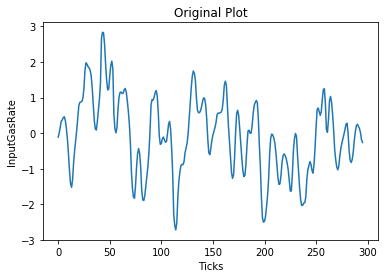

In [6]:
#Variation of Input Gas Rate with time
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('InputGasRate')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'InputGasRate', data = data);

**There is no general terend in the data that can be seen. It is varying smoothly over time**

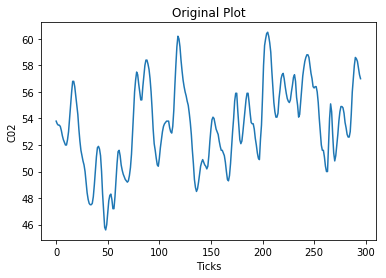

In [7]:
#Variation of CO2 level with time
fig = plt.figure(1)
ax2 = fig.add_subplot(111)
ax2.set_xlabel('Ticks')
ax2.set_ylabel('C02')
ax2.set_title('Original Plot')
ax2.plot('Ticks', 'CO2', data=data)

**There is no general terend in the data that can be seen. It is varying smoothly over time.**

Calculating the mean, std and other statistical terms for the data

In [8]:
data.describe()

,InputGasRate,CO2,Ticks
count,296.000000,296.000000,296.000000
mean,-0.056834,53.509122,147.500000
std,1.072766,3.202121,85.592056
min,-2.716000,45.600000,0.000000
25%,-0.830000,51.200000,73.750000
50%,0.000000,53.500000,147.500000
75%,0.680500,56.000000,221.250000
max,2.834000,60.500000,295.000000


In [9]:
data.columns

Index(['InputGasRate', 'CO2', 'Ticks'], dtype='object')

** Calculating the autocorrelation of the plot ** <br>
Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band.<br><br>

The plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis. The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values. Correlation values above these lines are more significant than those below the line, providing a threshold or cutoff for selecting more relevant lag values.

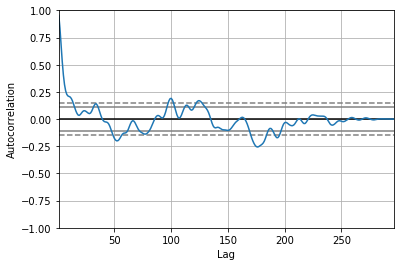

In [10]:
from pandas.plotting import autocorrelation_plot
plotting_data = data[['InputGasRate']]
autocorrelation_plot(plotting_data)

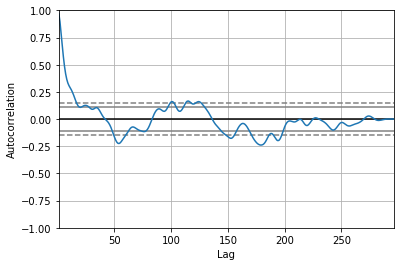

In [11]:
plotting_data = data[['CO2']]
autocorrelation_plot(plotting_data) 

/home/durgaprasad/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


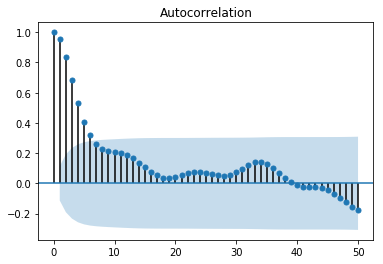

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plotting_data = data[['InputGasRate']]
plot_acf(plotting_data, lags=50)
plt.show()

**Calculating the Lag Plot**<br>
Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random.

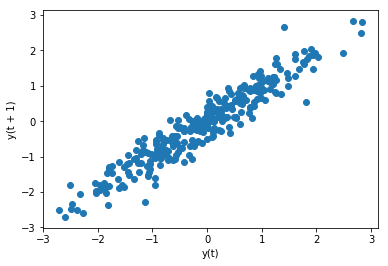

In [13]:
from pandas.plotting import lag_plot
plotting_data = data[['InputGasRate']]
lag_plot(plotting_data)

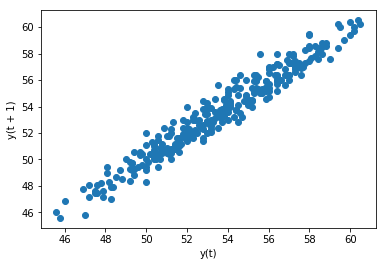

In [14]:
from pandas.plotting import lag_plot
plotting_data = data[['CO2']]
lag_plot(plotting_data)

**Persistance Model**<br>
The simplest model that we could use to make predictions would be to persist the last observation. We can call this a persistence model and it provides a baseline of performance for the problem that we can use for comparison with an autoregression model.

We can develop a test harness for the problem by splitting the observations into training and test sets, with only the last 7 observations in the dataset assigned to the test set as “unseen” data that we wish to predict.

The predictions are made using a walk-forward validation model so that we can persist the most recent observations for the next day. This means that we are not making a 7-day forecast, but 7 1-day forecasts.

In [15]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

In [16]:
series = data[["InputGasRate", "CO2"]]
print(series.head(5))
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
#X = dataframe.values
"""train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]"""
 
"""# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()"""

   InputGasRate   CO2
0        -0.109  53.8
1         0.000  53.6
2         0.178  53.5
3         0.339  53.5
4         0.373  53.4


ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements

In [29]:
data['Rolling_Mean'] = data[["InputGasRate"]].rolling(window = 15).mean()
data['Rolling_Mean'][0:14] = 0
data.head(5)
print(data.describe)

<bound method NDFrame.describe of      InputGasRate   CO2  Ticks  Rolling_Mean
0          -0.109  53.8      0      0.000000
1           0.000  53.6      1      0.000000
2           0.178  53.5      2      0.000000
3           0.339  53.5      3      0.000000
4           0.373  53.4      4      0.000000
5           0.441  53.1      5      0.000000
6           0.461  52.7      6      0.000000
7           0.348  52.4      7      0.000000
8           0.127  52.2      8      0.000000
9          -0.180  52.0      9      0.000000
10         -0.588  52.0     10      0.000000
11         -1.055  52.4     11      0.000000
12         -1.421  53.0     12      0.000000
13         -1.520  54.0     13      0.000000
14         -1.302  54.9     14     -0.260533
15         -0.814  56.0     15     -0.307533
16         -0.475  56.8     16     -0.339200
17         -0.193  56.8     17     -0.363933
18          0.088  56.4     18     -0.380667
19          0.435  55.7     19     -0.376533
20          0.771  55

/home/durgaprasad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


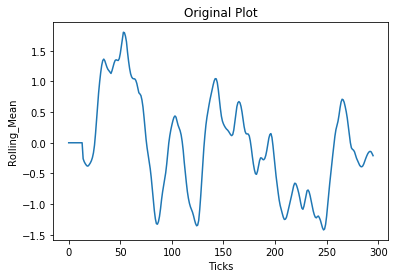

In [30]:
fig = plt.figure(1)
ax2 = fig.add_subplot(111)
ax2.set_xlabel('Ticks')
ax2.set_ylabel('Rolling_Mean')
ax2.set_title('Original Plot')
ax2.plot('Ticks', 'Rolling_Mean', data=data)

#### Plotting Original Data and Smoothed Data on Same Plot

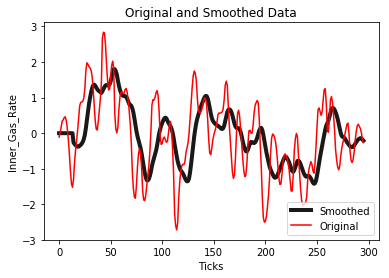

In [31]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(data['Ticks'], data['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.plot(data['Ticks'], data["InputGasRate"], color = (1,0,0), label = 'Original');
ax.set_title('Original and Smoothed Data')
ax.set_xlabel('Ticks')
ax.set_ylabel('Inner_Gas_Rate')
ax.legend(loc='lower right');

**Linear Regression Model**

In [32]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression().fit(data[['Ticks']], data[['Rolling_Mean']])
m = model.coef_[0]
b = model.intercept_
print("m :" + str(m))
print("b :" + str(b))

m :[-0.0037969]
b :[ 0.50353528]
